# **Project Die Walküre**




## Load Data


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd 
import numpy as np 
df = pd.read_csv('https://raw.githubusercontent.com/DialecticalJuche1912/renting-info.csv/main/renting-data.csv')
df 

<ipython-input-2-dd5940661f20>:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/DialecticalJuche1912/renting-info.csv/main/renting-data.csv')


,REF_DATE,GEO,DGUID,Type of structure,Type of unit,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1987,"Bay Roberts, Newfoundland and Labrador",2011S0504005,Row and apartment structures of three units an...,Bachelor units,Dollars,81,units,0,v42135513,192.3.1,NaN,..,NaN,NaN,0
1,1987,"Bay Roberts, Newfoundland and Labrador",2011S0504005,Row and apartment structures of three units an...,One bedroom units,Dollars,81,units,0,v42135529,192.3.2,NaN,..,NaN,NaN,0
2,1987,"Bay Roberts, Newfoundland and Labrador",2011S0504005,Row and apartment structures of three units an...,Two bedroom units,Dollars,81,units,0,v42135545,192.3.3,NaN,..,NaN,NaN,0
3,1987,"Bay Roberts, Newfoundland and Labrador",2011S0504005,Row and apartment structures of three units an...,Three bedroom units,Dollars,81,units,0,v42135561,192.3.4,NaN,..,NaN,NaN,0
4,1987,"Bay Roberts, Newfoundland and Labrador",2011S0504005,Row structures of three units and over,Bachelor units,Dollars,81,units,0,v42135577,192.2.1,NaN,..,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119027,2021,"Yellowknife, Northwest Territories",2011S0504995,Apartment structures of three units and over,Three bedroom units,Dollars,81,units,0,v3824416,188.1.4,2095.0,NaN,NaN,NaN,0
119028,2021,"Yellowknife, Northwest Territories",2011S0504995,Apartment structures of six units and over,Bachelor units,Dollars,81,units,0,v3824602,188.4.1,1234.0,NaN,NaN,NaN,0
119029,2021,"Yellowknife, Northwest Territories",2011S0504995,Apartment structures of six units and over,One bedroom units,Dollars,81,units,0,v3824790,188.4.2,1555.0,NaN,NaN,NaN,0
119030,2021,"Yellowknife, Northwest Territories",2011S0504995,Apartment structures of six units and over,Two bedroom units,Dollars,81,units,0,v3824978,188.4.3,1801.0,NaN,NaN,NaN,0


## Data Cleaning 


In [11]:
# Returning the row columns for this dataset
dir(df)
print(dir(df)[:15])

['COORDINATE', 'DECIMALS', 'DGUID', 'GEO', 'REF_DATE', 'SCALAR_FACTOR', 'SCALAR_ID', 'STATUS', 'SYMBOL', 'T', 'TERMINATED', 'UOM', 'UOM_ID', 'VALUE', 'VECTOR']


In [12]:
# dropping incomplete data 
complete_df = df.dropna(subset=['Type of unit', 'VALUE'])
# dropping unrelated columns 
complete_df_1 = complete_df[['REF_DATE', 'Type of unit', 'VALUE']]
# Replacing string row value under column Type of unit with integers 
replaced_df = complete_df_1.replace(['Bachelor units','One bedroom units',
                                     'Two bedroom units','Three bedroom units']
                                    , [1,1,2,3])
replaced_df
# rename unit column 
clean_df = replaced_df.rename(columns={"Type of unit":"Number of units"})
clean_df 

,REF_DATE,Number of units,VALUE
34,1987,2,480.0
49,1987,1,370.0
50,1987,2,414.0
51,1987,3,414.0
69,1987,1,254.0
...,...,...,...
119027,2021,3,2095.0
119028,2021,1,1234.0
119029,2021,1,1555.0
119030,2021,2,1801.0


### Variable sorting 

In [22]:
y = clean_df['VALUE']
np.array(y)

array([ 480.,  370.,  414., ..., 1555., 1801., 2074.])

In [23]:
# Actual rental price in dollars 
y 

34         480.0
49         370.0
50         414.0
51         414.0
69         254.0
           ...  
119027    2095.0
119028    1234.0
119029    1555.0
119030    1801.0
119031    2074.0
Name: VALUE, Length: 64457, dtype: float64

In [25]:
x = clean_df.drop('VALUE', axis=1)
x

,REF_DATE,Number of units
34,1987,2
49,1987,1
50,1987,2
51,1987,3
69,1987,1
...,...,...
119027,2021,3
119028,2021,1
119029,2021,1
119030,2021,2


## Data Splitting 

In [ ]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, 
                                                    random_state=100)


In [ ]:
x_train

,REF_DATE,Number of units
77194,2009,2
74464,2008,1
77991,2009,3
66634,2006,2
105190,2017,2
...,...,...
34087,1996,3
107888,2018,1
37691,1997,3
106117,2018,1


In [ ]:
x_test

,REF_DATE,Number of units
48179,2000,3
69491,2007,3
82936,2011,1
69005,2007,1
114696,2020,1
...,...,...
45797,2000,1
15846,1991,2
62135,2005,3
31382,1996,2


In [ ]:
y_train

77194     569.0
74464     411.0
77991     907.0
66634     466.0
105190    984.0
          ...  
34087     610.0
107888    531.0
37691     733.0
106117    656.0
79507     552.0
Name: VALUE, Length: 48342, dtype: float64

In [ ]:
y_test 

48179     511.0
69491     575.0
82936     402.0
69005     340.0
114696    575.0
          ...  
45797     372.0
15846     628.0
62135     500.0
31382     567.0
96647     728.0
Name: VALUE, Length: 16115, dtype: float64

##Model Building 

###Linear Regression 

Training the model 

In [ ]:
from sklearn.linear_model import LinearRegression 
# training the model on the following dataset 
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

Applying the model to make a prediction 

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

the 75% of the data 

In [ ]:
y_lr_train_pred

array([702.79604649, 556.76562724, 832.62730751, ..., 638.23740883,
       718.75720947, 848.82646574])

the remaining 25% of the data 

In [ ]:
y_lr_test_pred

array([686.8348835 , 800.22899107, 605.36310191, ..., 767.83067462,
       492.20698958, 929.82225686])

## Model performance comparison 
comparing the actual value vs the predicted value, to see the degree of dispersion they demonstrate once they are lined up 

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# for the training set 
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

# for the testing set 
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)


In [ ]:
print('The Mean Sqaured Error of the training set is: ', lr_train_mse)
print('The R2 score of the training set is:', lr_test_r2)
print('The Mean Sqaured Error of the testing set is: ', lr_test_mse)
print('The R2 score of the testing set is:', lr_test_r2)


The Mean Sqaured Error of the training set is:  38812.03160427942
The R2 score of the training set is: 0.4603002653986281
The Mean Sqaured Error of the testing set is:  40579.22132557558
The R2 score of the testing set is: 0.4603002653986281


In [ ]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Testing MSE', 'Testing R2']

In [ ]:
lr_results 

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear Regression,38812.031604,0.462199,40579.221326,0.4603


# Random Forest 

In [ ]:
# using the Random Forest algorithm 
from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor(max_depth =2, random_state = 100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

Model Application + Prediction making 

In [ ]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test) 

Model performance evaluation 

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# for the training set 
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

# for the testing set 
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Testing MSE', 'Testing R2']
rf_results 

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Random forest,43637.537083,0.395334,45441.551183,0.395632


In [ ]:
# now we have two two tables: Linear Regression and Random Forest 

# Combined end result

In [ ]:
df_combined = pd.concat([lr_results, rf_results], 
                        axis=0).reset_index(drop=True)

df_combined
# could also use other regression models from sklearn package 

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear Regression,38812.031604,0.462199,40579.221326,0.4603
1,Random forest,43637.537083,0.395334,45441.551183,0.395632


# Visualization of prediction results 

Text(0.5, 0, 'Actual Price of Housing')

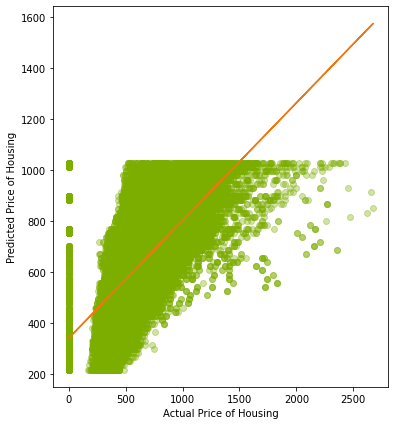

In [ ]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(6,7))
plt.scatter (x=y_train, y=y_lr_train_pred, c="#7CAE00", alpha=0.35)

# labelling x and y axies 
line1 = np.polyfit(y_train, y_lr_train_pred, 1)
line2 = np.poly1d(line1)
plt.plot(y_train,line2(y_train), '#E71')
plt.ylabel('Predicted Price of Housing')
plt.xlabel('Actual Price of Housing')
